## 📌 Student Performance Prediction — Project Overview

## 🧩 Problem Statement
The purpose of this project is to build a **Linear Regression Model** that can predict a student's **Performance Index** based on academic and lifestyle factors.  
The prediction is based on hours studied, previous scores, sleep, and other activities.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
Student Performance Dataset

## 🌐 Source  
Kaggle / Student_Performance.csv

## 🔗 URL  
https://github.com/subodhkryadav/machine-learning-portfolio/blob/main/ml-practice/supervised/regression/linear_regression/dataset.csv

---

## 📐 Dataset Shape
- **Total Rows:** 10,000  
- **Total Columns:** 6  

---

## 🧬 Dataset Columns
- **Hours Studied** – Number of hours the student studied  
- **Previous Scores** – Scores obtained in previous tests  
- **Extracurricular Activities** – Participation in activities (Yes/No)  
- **Sleep Hours** – Average hours of sleep per day  
- **Sample Question Papers Practiced** – Number of practice papers solved  
- **Performance Index** – Target variable (10.0 to 100.0)

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X) — 5 Total
We will use the following 5 features:

- Hours Studied  
- Previous Scores  
- Extracurricular Activities  
- Sleep Hours  
- Sample Question Papers Practiced  

## 🎯 Target (y)
- **Performance Index** (Student's overall performance score)

---

## 📚 Steps We Will Perform

1. Load the dataset  
2. Explore the dataset (EDA)  
3. Encode Categorical Data (Extracurricular Activities)  
4. Split the data into Training and Testing sets  
5. Train a Linear Regression Model  
6. Evaluate the Model (MSE, R-Squared)  
7. Visualize Actual vs Predicted Results  
8. Interpret the Coefficients  

---

## import some of the library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load the dataset

In [ ]:
df=pd.read_csv("dataset.csv")

In [15]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### check the null value

In [19]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

#### some of the analysis part

In [23]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 126.23it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

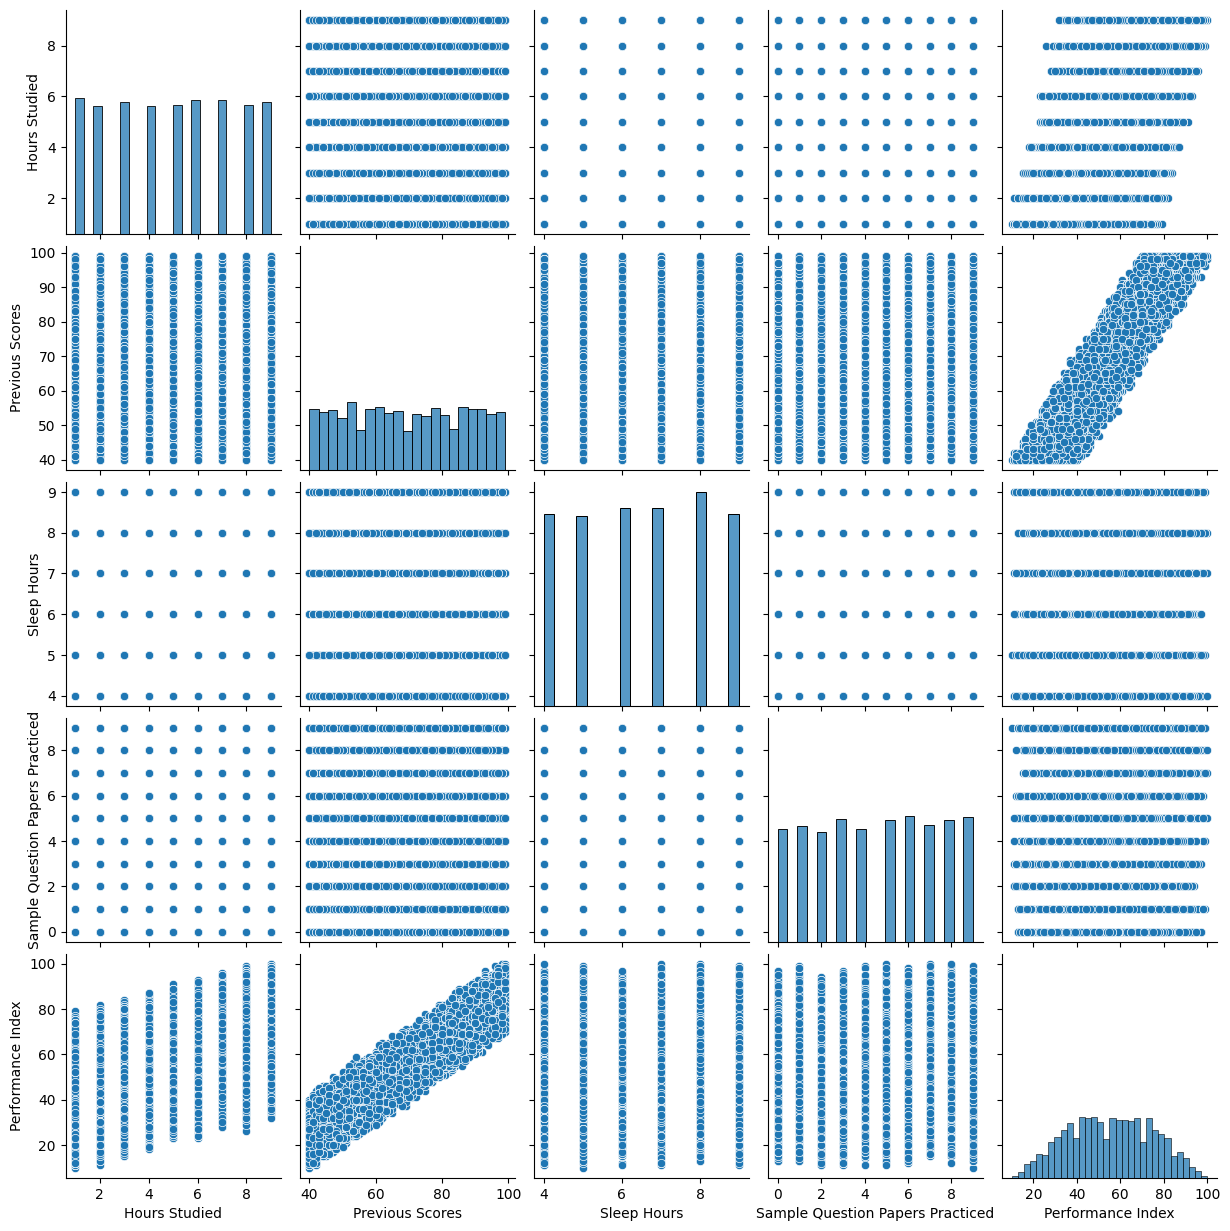

In [100]:
sns.pairplot(df)

#### Now select the label and feature column

In [27]:
y=df[["Performance Index"]]

In [33]:
x=df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]]

In [35]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [37]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


#### Now preprocession

In [41]:
scaler=StandardScaler()

In [45]:
arr_x=scaler.fit_transform(x)

In [47]:
arr_x

array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394]])

In [49]:
df1=pd.DataFrame(arr_x)

In [51]:
df1

,0,1,2,3
0,0.775188,1.704176,1.456205,-1.249754
1,-0.383481,0.723913,-1.492294,-0.900982
2,1.161410,-1.063626,0.276805,-0.900982
3,0.002742,-1.005963,-0.902594,-0.900982
4,0.775188,0.320275,0.866505,0.145333
...,...,...,...,...
9995,-1.542149,-1.178951,-1.492294,-0.900982
9996,0.775188,-0.314013,0.866505,0.145333
9997,0.388965,0.781575,0.866505,0.145333
9998,1.547633,1.588851,0.276805,-1.598526


#### check the multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
df_vif=pd.DataFrame()

In [63]:
df_vif['vif']=[variance_inflation_factor(arr_x,i)for i in range(arr_x.shape[1])]

In [65]:
df_vif['feature']=x.columns

In [67]:
df_vif

,vif,feature
0,1.000464,Hours Studied
1,1.000254,Previous Scores
2,1.000052,Sleep Hours
3,1.000386,Sample Question Papers Practiced


#### Now model selection

In [72]:
x_train,x_test,y_train,y_test=train_test_split(arr_x,y,test_size=0.25)

In [74]:
x_train.shape

(7500, 4)

In [78]:
x_test.shape

(2500, 4)

In [80]:
y_train.shape

(7500, 1)

In [82]:
y_test.shape

(2500, 1)

#### Creat the Linear Model

In [87]:
model=LinearRegression()

In [89]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### model score

In [123]:
model.score(x_test,y_test)

0.9886291007433669

#### the model give the 98% accurate result

### combine the scaler and model then save it

#### import the library

In [132]:
from sklearn.pipeline import Pipeline
final_pipeline=Pipeline([
    ("scaler", scaler),
    ("model",model)
])

#### save the model

In [136]:
pickle.dump(final_pipeline,open('Student_Performance_model.pickle','wb'))

## Test the model it work or not

In [139]:
import numpy as np
import pickle
file_name='Student_Performance_model.pickle'
with open(file_name,'rb')as file:
    loaded_pipeline = pickle.load(file)
user_raw_features = [[7,99,9,1]] 

prediction = loaded_pipeline.predict(user_raw_features)

print("--- Prediction Result ---")
print(f"Predicted Performance Index: {prediction[0]}")

--- Prediction Result ---
Predicted Performance Index: [91.53207411]


C:\Users\subod\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
